 Table of Contents
 Step1. Warm-up
 Step2. Implement OCR code in Tensorflow Add new layer Drop out Step 3. Stochastic Gradient Descent

 ## Step1

In [34]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


 Analyze the response and explain what tf.Session() and tf.constant() commands do.???

 ## Step2. Implement OCR code in Tensorflow

In [35]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [36]:
#Q1- Explain this portion of the code.
#Q2- what is the usage of one_hot in read_data_sets() command.



In [37]:
# Functions that can define the size of train and test sets
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test



In [38]:
import matplotlib.pyplot as plt
import random as ran
import numpy as np



In [39]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()



In [40]:
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()



Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


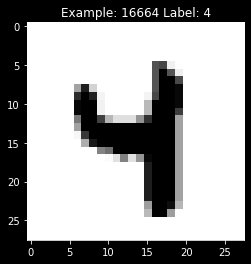

In [41]:
x_train, y_train = TRAIN_SIZE(55000)

x_test, y_test = TEST_SIZE(10000)

display_digit(ran.randint(0, x_train.shape[0]))



In [42]:
sess = tf.Session()

# Input and output
x = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
y_ = tf.placeholder(tf.float32, shape=[None, 10]) # 0-9 digits (10 classes)

# Model parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


y = tf.nn.softmax(tf.matmul(x,W) + b)



In [43]:
#Q3- It appears that tf.placeholder() , tf.Variable() and tf.constant() all are for assigning variables so what is the difference between them?



In [44]:
init = tf.global_variables_initializer()
sess.run(init)



In [45]:
LEARNING_RATE = 0.1
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [46]:
#Q.4) Write a few sentences about tf.train.GradientDescentOptimizer and tf.equal commands. What is the effect of tf.argmax()



In [47]:
TRAIN_STEPS = 250
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + ' Loss = ' +
    str(sess.run(cross_entropy, {x: x_train, y_: y_train})))



Training Step:0 Accuracy = 0.6705 Loss = 2.1970637
Training Step:100 Accuracy = 0.8713 Loss = 0.6085837
Training Step:200 Accuracy = 0.8857 Loss = 0.49071002


In [48]:
#Q5- Explain this part of the code.



In [49]:
# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)



In [50]:
# Two hidden layers, output layer and their number of neurons (the last layer has 10 softmax neurons)
L = 100
M = 30



In [51]:
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))



In [52]:
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Ylogits = tf.matmul(Y2, W3) + B3
Y = tf.nn.softmax(Ylogits)



In [53]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100



W0828 19:26:45.510898 4399412672 deprecation.py:323] From <ipython-input-53-bb0c77e797b5>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [54]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [55]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)



In [56]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={X: x_train, Y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test})) + ' Loss = ' +
    str(sess.run(cross_entropy, {X: x_train, Y_: y_train})))


Training Step:0 Accuracy = 0.101 Loss = 348.7968
Training Step:100 Accuracy = 0.359 Loss = 164.20326
Training Step:200 Accuracy = 0.8959 Loss = 35.985588
Training Step:300 Accuracy = 0.9496 Loss = 17.233734
Training Step:400 Accuracy = 0.9615 Loss = 11.407676
Training Step:500 Accuracy = 0.9497 Loss = 17.14185
Training Step:600 Accuracy = 0.9622 Loss = 10.304208
Training Step:700 Accuracy = 0.8501 Loss = 48.198006
Training Step:800 Accuracy = 0.9594 Loss = 11.326192
Training Step:900 Accuracy = 0.9609 Loss = 10.783799
Training Step:1000 Accuracy = 0.9666 Loss = 7.943177


 Drop out
 Tensorflow can make dropout algorithm. By default it can keep 75% of the nodes during the
 trainin

In [57]:
# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)
pkeep = tf.placeholder(tf.float32)
L = 100
M = 30
N = 60
O = 30
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)
Ylogits = tf.matmul(Y2d, W3) + B3
Y = tf.nn.softmax(Ylogits)



W0828 19:30:23.281317 4399412672 deprecation.py:506] From <ipython-input-57-34501b2e4ceb>:19: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100


# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
LEARNING_RATE = 0.01

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={X: x_train, Y_: y_train, pkeep: 0.75 })
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test, pkeep: 1.0})) + 
    'Loss = ' + str(sess.run(cross_entropy, {X: x_train, Y_: y_train , pkeep: 0.75})))


Training Step:0 Accuracy = 0.2278Loss = 224.64679
Training Step:100 Accuracy = 0.9124Loss = 38.704247
Training Step:200 Accuracy = 0.9482Loss = 24.144064
Training Step:300 Accuracy = 0.9561Loss = 18.979002
Training Step:400 Accuracy = 0.963Loss = 15.365937
Training Step:500 Accuracy = 0.9646Loss = 13.286249
Training Step:600 Accuracy = 0.9655Loss = 11.921047
Training Step:700 Accuracy = 0.967Loss = 10.279636
Training Step:800 Accuracy = 0.9697Loss = 9.224567
Training Step:900 Accuracy = 0.9702Loss = 8.583889
Training Step:1000 Accuracy = 0.9704Loss = 8.140555


 ## Step 3. Stochastic Gradient Descent